# ACP : analyse des composants principales 

***L'analyse des composantes principales*** n'est pas focément un algorithme de Machine Learning, mais nous pouvons le considérer comme une approche d'apprentissage non-supervisé (exploration des données).

L'analyse des composantes principales essaie de trouver les axes principaux qui sont des variables décorrélées qui décrivent au mieux nos données.

L'analyse va étre realiser sur des données proviennent de
l’ouvrage de **Gilbert Saporta (2006 ; tableau 17.1, page 428)** qui fait référence en analyse de
données. Il s’agit de résumer l’information contenue dans un fichier décrivant **(n = 18)**
**véhicules** à l’aide de **(p = 6)** **variables** .

En effet, appliquer l’outil PCA sur les données
pour obtenir les coordonnées factorielles des individus et des variables (vecteurs propres) est
relativement simple. Les difficultés commencent avec la production des éléments d’aide à
l’interprétation ( **COS²** et **CTR** des individus et variables, **cercle des corrélations** ), et le
traitement des individus et variables illustratifs. Il faudra mettre un peu la main à la pâte. On
se rend compte que **Python** est parfaitement outillé et souple pour réaliser une étude
complète, équivalente à ce que l’on pourrait obtenir sous R avec des packages performants. Il
faut savoir exploiter les résultats intermédiaires fournis par PCA simplement.

## Partie 1 : Préparation des données



#### 1.1 Importation des données

In [1]:
# importation des librairies nécessaires à l'analyse des données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# classe de standarisation
from sklearn import decomposition
from sklearn import preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Permet d'avoir des cellules de taille 80
pd.set_option("max_colwidth", 80)

In [4]:
# Création d'un DF qui donne tous les DF et leurs significations
id =["coord","valProp","somValProp","methBatton","contribIndivAxeFact","qualIndivCos2", "contribInertTot", "CorrelaIndivVar",
     "qualVarCos2", "contribVarCompo" ,"barycentreGroup"]
meta_df = pd.DataFrame({'Commentaires': 
                        ['Coordonnées des individus sur les axes factorielles',
                         'Valeur propre = Variance composante principale',
                         'Somme des variances expliqués = Somme des valeurs propres',
                         "Methode des batons",
                         "Contribution des individus aux axes factorielles",
                         "Qualité de la représentation des individus dans le plan factoriel",
                         "Contribution des individus dans l'inertie totale",
                         "DF des corrélations entre les variables et les composantes  ",
                         "Qualité de la représentation des variables",
                         "Contribution de la variable  à la composante",
                         "Barycentre de chaque groupes"]}, index=id )
meta_df

,Commentaires
coord,Coordonnées des individus sur les axes factorielles
valProp,Valeur propre = Variance composante principale
somValProp,Somme des variances expliqués = Somme des valeurs propres
methBatton,Methode des batons
contribIndivAxeFact,Contribution des individus aux axes factorielles
qualIndivCos2,Qualité de la représentation des individus dans le plan factoriel
contribInertTot,Contribution des individus dans l'inertie totale
CorrelaIndivVar,DF des corrélations entre les variables et les composantes
qualVarCos2,Qualité de la représentation des variables
contribVarCompo,Contribution de la variable à la composante


In [5]:
# Remet les valeurs d'origine
pd.reset_option("max_colwidth")

In [7]:
data=pd.read_csv("/content/cars-data.csv",sep=";", index_col=0)
data

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


In [8]:
#verifier l'imporatation du Pandas
print(pd.__version__)

1.3.5


In [9]:
# On nomme le DF X
X=data

# dimension
print(X.shape)

# nombre d'observation
n=X.shape[0]
p=X.shape[1]

(18, 6)


#### 1.2 Préparation des données

In [10]:
# verifier l'importation du Sklearn
print(sklearn.__version__)


1.0.2


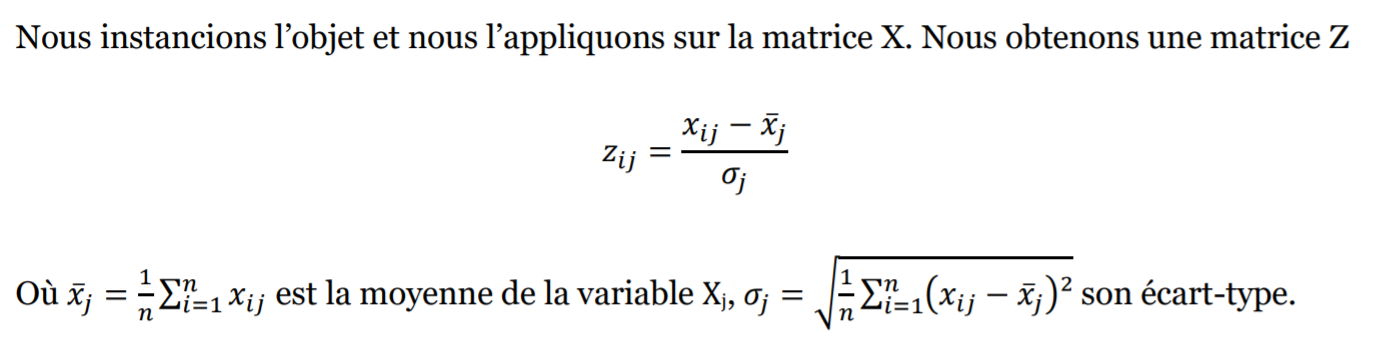

In [11]:
# instanciation
# Standardisez les caractéristiques en supprimant la moyenne 
# et en mettant à l'échelle la variance unitaire.
sc=StandardScaler()

# on travaille avec des données centrées reduites
# Le centrage et la mise à l'échelle se produisent indépendamment sur chaque fonctionnalité 
# en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. 
# La moyenne et l'écart type sont ensuite stockés pour être utilisés sur des données 
# ultérieures à l'aide de la transformation .
Z=sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [12]:
# on vérifie que les données soient centrées
   # Calculer la moyenne arithmétique le long de l'axe spécifié.
   # Renvoie la moyenne des éléments du tableau. 
   # La moyenne est prise sur le tableau aplati par défaut, sinon sur l'axe spécifié.
print(np.mean(Z,axis=0))

# et réduite
   # Calculez l'écart type des données données (éléments de tableau) 
   # le long de l'axe spécifié (le cas échéant).
print(np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
[1. 1. 1. 1. 1. 1.]


## Partie 2 : Analyse en composantes principales (scikit-learn)

#### 2.1 Instanciation et lancement des calculs

Le paramètre **(svd_solver = ‘full’)** indique l’algorithme utilisé pour la décomposition en
valeurs singulières. Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par
défaut pour l’appréhension des bases de taille réduite. D’autres approches sont disponibles
pour le traitement des grands ensembles de données. Le nombre de composantes (K) n’étant
pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = p).
Nous pouvons lancer les traitements dans un second temps. La fonction fit_transform()
renvoie en sortie les coordonnées factorielles Fik que nous collectons dans la variable ***coord*** . Nous affichons le nombre de composantes générées (K), il est bien
égal à p = 6.

In [13]:
acp=PCA(svd_solver='full')

In [14]:
acp

PCA(svd_solver='full')

La propriété .explained_variance_ semble faire l’affaire pour obtenir les variances
(valeurs propres, **λk**) associées aux axes factoriels.


In [15]:
# calculs
coord = acp.fit_transform(Z)

# nombre de composantes calculées
print(acp.n_components_)

6


#### 2.2 Valeurs propres et scree plot

Diagramme "scree-plot" établi entre le nombre de dimensions de l'ACP et les valeurs propres. 


La propriété **.explained_variance_** semble bonne pour obtenir les variances(valeurs propres , λ) associées aux axes factoriels.

In [16]:
# variances expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [17]:
# Nous n'avons pas les bonnes valeurs, il faut ajouter une correction
valProp = (n-1)/n*acp.explained_variance_
print(valProp)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


Nous aurion pu obtenir les bonnes **valeurs propre** en passant par les valeurs singulières **.singular_values_** issues
de la factorisation de la matrice des données centrées reduites

In [18]:
# ou bien en passant par les valeurs singulières
print (acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


**PCA** fournit également les proportions de variances associées aux axes. il n'est pas nécessaire d'effectuer une correction dans ce cas

In [19]:
# proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La première composante accapare **73.68%** de l’information disponible. Il y a un fort ‘’effet
taille’’ dans nos données. Nous disposons de **87.94%** avec les deux premiers
facteurs. Les suivants semblent anecdotiques.
Nous disposons des éléments permettant de construire le graphique ‘’Scree plot’’

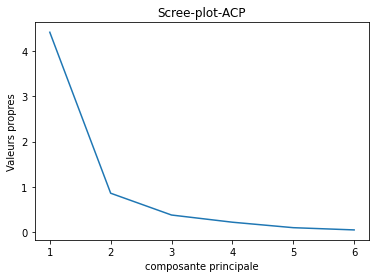

In [20]:
# screen plot
plt.plot(np.arange(1,p+1),valProp)
plt.title("Scree-plot-ACP")
plt.ylabel("Valeurs propres")
plt.xlabel("composante principale")
plt.show()

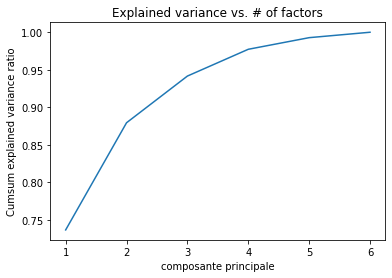

In [21]:
# Cumul de variance expliquée
# Le graphique du cumul de variance restituée selon le nombre de facteurs peut être intéressant .
plt.plot(np.arange(1,1+p), np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel('composante principale')
plt.show()

#### 2.3 Détermination du nombre de fateur à retenir

Les ‘’cassures’’ dans les graphiques ci-dessus  sont souvent évoquées
(règle du coude) pour identifier le nombre de facteurs K* à retenir. La solution (K* = 2)
semble s’imposer ici.


D’autres pistes existent pour répondre à cette question toujours délicate qui conditionne
l’interprétation de l’ACP, notamment le « test des bâtons brisés » de Legendre & Legendre
(1983)


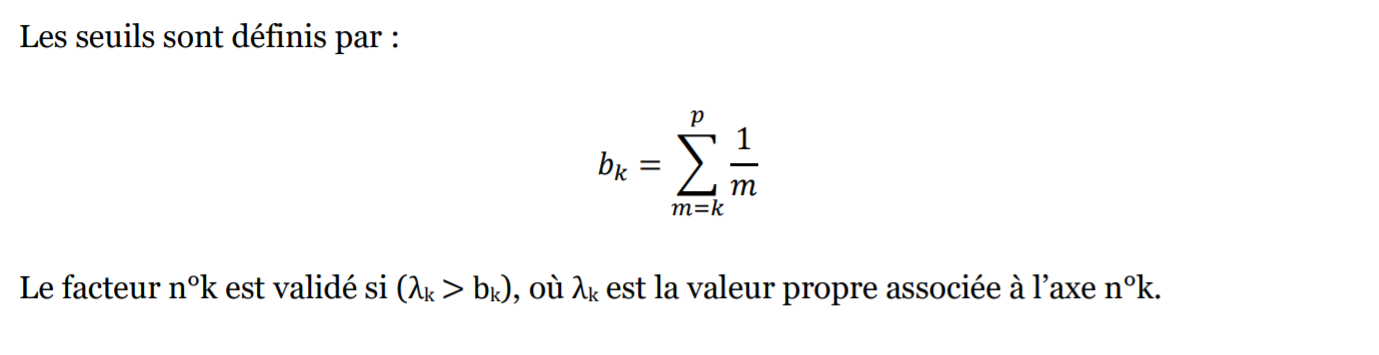

In [22]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

Puis affichons conjointement les valeurs propres et les seuils :


In [23]:
# test des bâtons brisés
methBatton= pd.DataFrame({'Val.Propre':valProp, 'Seuils':bs})
methBatton

,Val.Propre,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


Avec cette procédure, seul le premier facteur est valide. Le cercle des corrélations que nous
construirons par la suite (Figure 5) semble aller dans le même sens.
Néanmoins, par commodité (pas seulement en réalité, cette étude est plus subtile qu’elle n’en
a l’air , nous choisissons **K* = 2** pour pouvoir représenter les individus et les
variables dans le plan.


#### 2.4 Représentation des individus

***Coordonnées factorielles***:
Les coordonnées factorielles **(F**ik**)** des individus ont été
collectées dans la variable ***coord*** . Nous les positionnons dans **le premier plan**
**factoriel** avec leurs labels pour situer et comprendre les proximités entre les véhicules.
Je ferai deux commentaires au préalable :
1. *L’ajout d’une étiquette* dans un graphique nuage de points n’est pas très pratique sous
Python (librairie Matplotlib), ma solution a le mérite de fonctionner, je ne sais pas s’il y a
plus simple (j’ai cherché pourtant).
2. *Les outils graphiques* calculent souvent automatiquement les échelles en fonction des
plages de valeurs. Ce n’est pas une bonne idée en ce qui concerne l’ACP. En effet, les axes
n’ont pas la même importance (% de variance restituée). Pour ne pas fausser la
perception des proximités, il est très important de veiller à ce que les échelles soient
identiques en abscisse et en ordonnée. ***Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes.*** Nous nous rendons compte
directement dans notre graphique que les **dispersions des individus** sont nettement plus
marquées sur le premier axe, en abscisse .

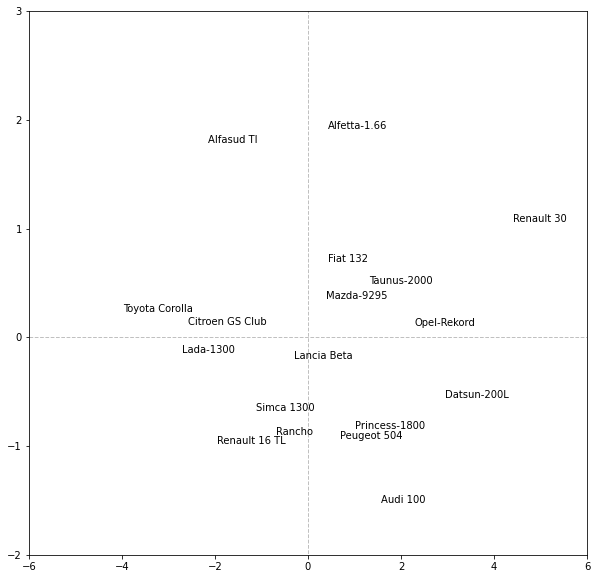

In [24]:
# Positionnement des individus dans le premier plan
fig,axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6)
axes.set_ylim(-2,3)

# Placement des étiquettes et des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
# ajouter des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-6,6],color='silver', linestyle='--', linewidth=1)

# affichage
plt.show()

***Qualité de représentation*** – Les COS² (cosinus carré). Pour calculer la qualité de
représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans
l’inertie totale
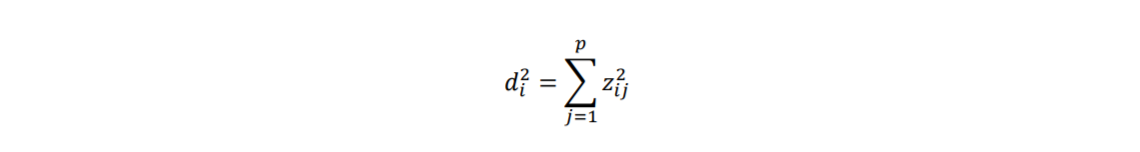

In [25]:
# Contribution des individus dans l'inertie totale
contribInert=np.sum(Z**2,axis=1)
contribInertTot = (pd.DataFrame({'contribInert':contribInert},index=X.index))
contribInertTot

,contribInert
Modele,
Alfasud TI,8.225176
Audi 100,6.673755
Simca 1300,2.159327
Citroen GS Club,6.780145
Fiat 132,1.169124
Lancia Beta,1.134950
Peugeot 504,1.512793
Renault 16 TL,5.636826
Renault 30,21.789657


Concrètement, **la Renault 30** et la **Toyota Corolla** sont les deux véhicules qui se démarquent
le plus des autres, et on les retrouve aux deux extrémités du premier axe factoriel qui porte
**73.68%** de l’information disponible.

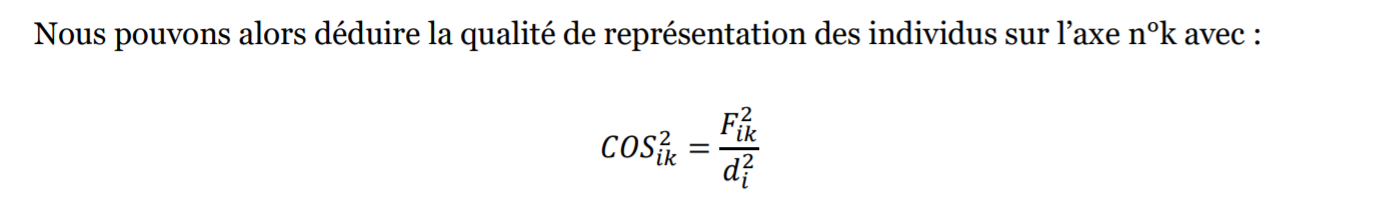

In [27]:
# qualité de la représentation des individus  COS2
qualIndivCos2=coord**2
for j in range(p):
    qualIndivCos2[:,j]=qualIndivCos2[:,j]/contribInert
    
df_cos2=pd.DataFrame({'cos2-axe1':qualIndivCos2[:,0],'cos2-axe2':qualIndivCos2[:,1]},index = X.index)
df_cos2

,cos2-axe1,cos2-axe2
Modele,,
Alfasud TI,0.556218,0.387670
Audi 100,0.365334,0.349406
Simca 1300,0.580284,0.210694
Citroen GS Club,0.976992,0.001879
Fiat 132,0.156579,0.413826
Lancia Beta,0.081555,0.033900
Peugeot 504,0.309202,0.575488
Renault 16 TL,0.673539,0.170535
Renault 30,0.892431,0.051920


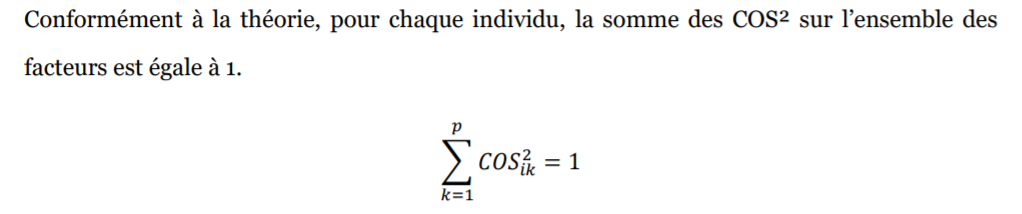

In [29]:
# Vérifie la théorie - somme des lignes des cos2=1
print(np.sum(qualIndivCos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


***Contribution des individus aux axes (CTR)***. Elles permettent de déterminer les
individus qui pèsent le plus dans la définition de chaque facteur.
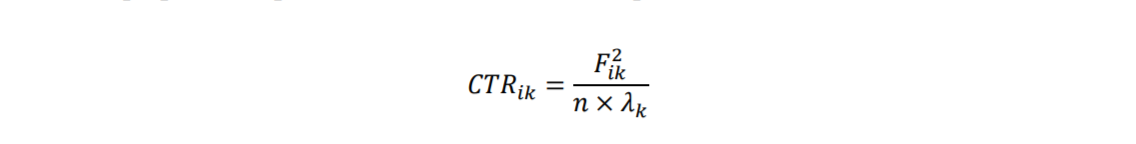

In [30]:
# Contribution aux axes
ctr=coord**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*valProp[j])

contribIndivAxeFact	 = pd.DataFrame({'CTR-axe1':ctr[:,0],'CTR-axe2':ctr[:,1]},index=X.index)
contribIndivAxeFact	


,CTR-axe1,CTR-axe2
Modele,,
Alfasud TI,0.057493,0.206933
Audi 100,0.030640,0.151329
Simca 1300,0.015746,0.029525
Citroen GS Club,0.083244,0.000827
Fiat 132,0.002300,0.031398
Lancia Beta,0.001163,0.002497
Peugeot 504,0.005878,0.056499
Renault 16 TL,0.047711,0.062384
Renault 30,0.244369,0.073419


Sans surprises, ce sont la **Renault 30** et la **Toyota Corolla** qui sont déterminants pour le
*premier axe* ; pour *le second*, nous avons **l’Alfetta-1.66**, **l’Alfasud TI** et **l’Audi 100**.

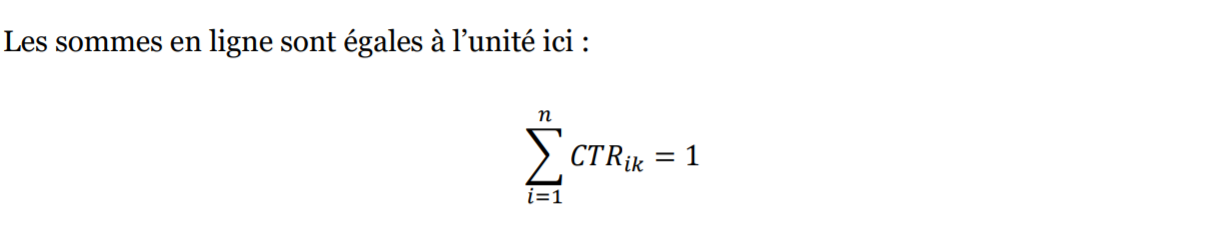

In [31]:
# On vérifie la théorie : ΣCTRik=1
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


#### 2.5 Représentation des variables – Outils pour l’aide à l’interprétation

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ **.components_**


In [32]:
# le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


**`Point important:`**
les `facteurs` sont en `ligne`, les `variables` en `colonne`.
Nous devons en tenir compte pour obtenir les corrélations en les multipliants par `la racine carrée des valeurs propres`

In [33]:
# racine carré des valeurs propres
sqrt_valProp = np.sqrt(valProp)

# corrélation des variables avec les axes
corvar = np.zeros((p,p ))

for k in range(p):
    corvar[: , k] = acp.components_[k, :]*sqrt_valProp[k]

# afficher la matrice des corrélations variables x facteurs
print(corvar)

# Les variables sont maintenant en ligne, les facteurs en colonne

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [34]:
# On affiche pour les 2 premiers axes
df_id = pd.DataFrame({'COR-axe1':corvar[:,0],'COR-axe2':corvar[:,1]},index = X.columns)
df_id

,COR-axe1,COR-axe2
CYL,0.893464,0.114906
PUISS,0.886858,0.384689
LONG,0.886155,-0.381029
LARG,0.813536,-0.412736
POIDS,0.905187,-0.224532
V_MAX,0.754710,0.573519


Nous pouvons dessiner maintenant le ***cercle des corrélations*** 

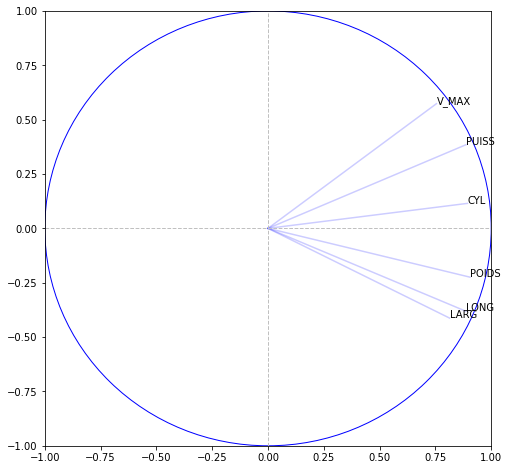

In [35]:
# cercle des correlations
fig,axes=plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

# affichage
plt.show()

On perçoit clairement l’effet **taille** sur le **premier axe** : les voitures **puissantes** et **rapides** sont
aussi les plus **lourdes** et imposantes, la relation globale entre les variables est en réalité
déterminée par la cylindrée **(CYL)**.


Qualité de représentation des variables (COS²). On peut calculer la qualité de
représentation des variables
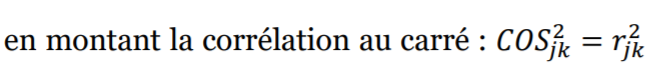

In [36]:
# cosinus carré des variables
cos2var=corvar**2
qualVarCos2 = pd.DataFrame({'COS2-axe1':cos2var[:,0],'COS2-axe2':cos2var[:,1]},index=X.columns)
qualVarCos2

,COS2-axe1,COS2-axe2
CYL,0.798277,0.013203
PUISS,0.786517,0.147986
LONG,0.785270,0.145183
LARG,0.661841,0.170351
POIDS,0.819364,0.050415
V_MAX,0.569588,0.328925


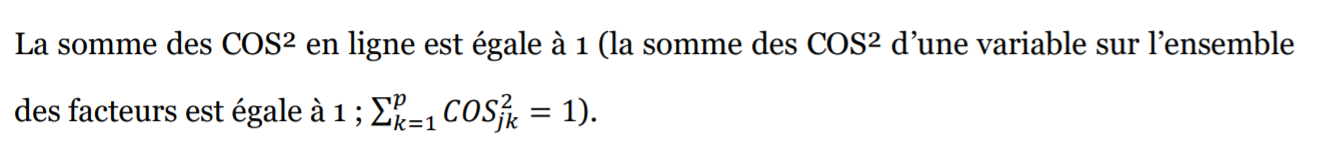
<br>
***Contribution des variables aux axes (CTR)***. La contribution est également basée sur le
carré de la corrélation, mais relativisée par l’importance de l’axe
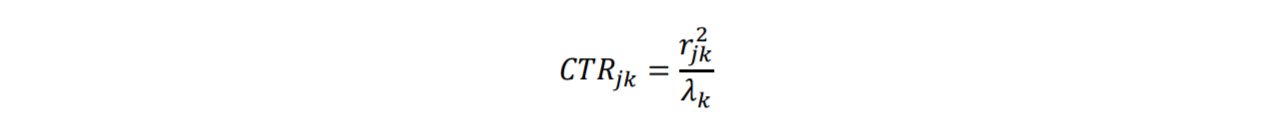

In [37]:
# contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/valProp[k]
    
# on n'affiche que les 2 premiers axes
qualVarCos2 = pd.DataFrame({'CTR-axe1':ctrvar[:,0],'CTR-axe2':ctrvar[:,1]},index=X.columns)
qualVarCos2

,CTR-axe1,CTR-axe2
CYL,0.180571,0.015423
PUISS,0.177911,0.172868
LONG,0.177628,0.169594
LARG,0.149709,0.198994
POIDS,0.185341,0.058892
V_MAX,0.128841,0.384230


## Partie 3 : Traitement des individus et variables illustratifs

#### 3.1 Individus supplémentaires

Nous souhaitons positionner deux véhicules supplémentaires, des Peugeot, par rapport aux
existantes

Nous les chargeons avec read_excel() de Pandas, elles sont situées dans le seconde feuille
du classeur Excel (sheet_name = 1)

In [38]:
indSup=pd.read_csv("/content/cars-supp-data.csv",sep=";",index_col=0)
indSup

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


Nous devons **centrer et réduire** les variables des individus supplémentaires à l’aide des
paramètres (**moyennes et écarts-type**) des données actives ayant servi à construire le repère
factoriel.

In [39]:
# centrage et reduction avec les paramètres des individus actifs
ZindSup=sc.transform(indSup)
print(ZindSup)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


Il ne reste plus qu’à faire calculer par la fonction **.transform()** leurs coordonnées.

In [40]:
# projection dans l'espace factoriel
coordSup=acp.transform(ZindSup)
print(coordSup)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


Et à les représenter dans le premier ***plan factoriel*** parmi les observations actives.

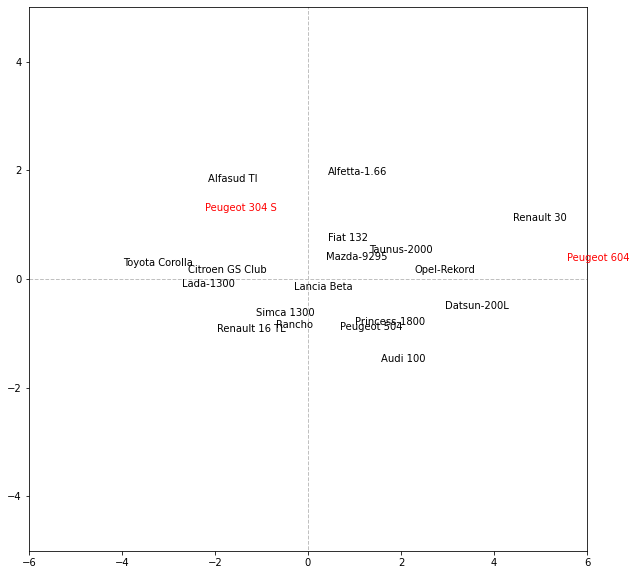

In [41]:
# positionnement des individus supplémentaires dans le premeier plan
fig,axes=plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6)
axes.set_ylim(-5,5)

# étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

# etiquette des points supplémmentaires (illustratif) en bleu
for i in range(coordSup.shape[0]):
    plt.annotate(indSup.index[i],(coordSup[i,0],coordSup[i,1]),color='red')
    
# ajouter des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='--',linewidth=1)

# affichage
plt.show()

La **Peugeot 604 **se rapproche plutôt de **la Renault 30**, la **Peugeot 304** de **l’Alfasud TI**. Pour qui
connaît un peu les voitures de ces années-là, tout cela est parfaitement **cohérent**.

#### 3.2 Variables supplémentaires

In [42]:
# on reccupère les variables sup
VarSup=pd.read_csv("/content/cars-var-data-supp.csv",sep=";",index_col=0)
VarSup

,PRIX,R_POIDS_PUIS,FINITION
Modele,,,
Alfasud TI,30570,11.013,2_B
Audi 100,39990,13.059,3_TB
Simca 1300,29600,15.441,1_M
CitroenGS Club,28250,15.763,1_M
Fiat 132,34900,11.276,2_B
Lancia Beta,35480,13.171,3_TB
Peugeot 504,32300,14.684,2_B
Renault 16 TL,32000,18.364,2_B
Renault 30,47700,10.313,3_TB


In [44]:
# on reccupère les variables quantitatives dans un format np
vsQuanti= VarSup.iloc[:,:2].values
print(vsQuanti)

[[3.0570e+04 1.1013e+01]
 [3.9990e+04 1.3059e+01]
 [2.9600e+04 1.5441e+01]
 [2.8250e+04 1.5763e+01]
 [3.4900e+04 1.1276e+01]
 [3.5480e+04 1.3171e+01]
 [3.2300e+04 1.4684e+01]
 [3.2000e+04 1.8364e+01]
 [4.7700e+04 1.0313e+01]
 [2.6540e+04 1.4818e+01]
 [4.2395e+04 9.7250e+00]
 [3.3990e+04 1.4146e+01]
 [4.3980e+04 1.1913e+01]
 [3.5010e+04 1.1020e+01]
 [3.9450e+04 1.4113e+01]
 [2.7900e+04 1.3193e+01]
 [3.2700e+04 1.1200e+01]
 [2.2100e+04 1.4044e+01]]


Nous calculons les **corrélations** de ces variables avec les axes factoriels exprimés par les
coordonnées des observations.

In [45]:
# Corrélation avec les axes fatoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k]=np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
        
# affichage des corrélation avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903133 -0.67252871 -0.15019774  0.21363857  0.10163937  0.29003495]]


Avec ces nouvelles coordonnées, nous pouvons placer les variables dans le **cercle des corrélations**

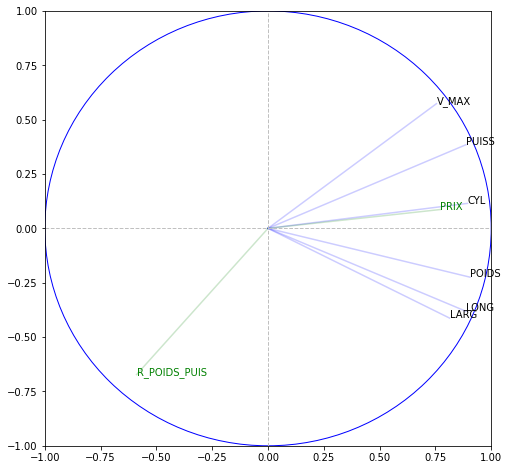

In [46]:
# cercle des corrélations avec var supp
fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# variables actives
for j in range (p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)
    
# variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(VarSup.columns[j],(corSupp[j,0],corSupp[j,1]),color='green')
    plt.plot([0,corSupp[j,0]],[0,corSupp[j,1]],color='g',alpha=0.2)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter un cercle
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)

# affichage
plt.show()


- la variable **prix** est globalement corrélées avec l'ensemble des variables, emportée par la première composante principale
- **R_POIDS_PUIS** (rapport poids-puissance) est quasi orthogonale au premier facteur. elle est à l'opposée de **V_max**


#### 3.3 Variable illustrative qualitative

Nous isolons la **variable illustrative** **qualitative** dans une structure spécifique. Nous affichons
la liste des valeurs.

In [48]:
# traitement de variable qualitative supplémentaire
vsQuali=VarSup.iloc[:,2]
vsQuali

Modele
Alfasud TI         2_B
Audi 100          3_TB
Simca 1300         1_M
CitroenGS Club     1_M
Fiat 132           2_B
Lancia Beta       3_TB
Peugeot 504        2_B
Renault 16 TL      2_B
Renault 30        3_TB
Toyota Corolla     1_M
Alfetta-1.66      3_TB
Princess-1800      2_B
Datsun-200L       3_TB
Taunus-2000        2_B
Rancho            3_TB
Mazda-9295         1_M
Opel-Rekord        2_B
Lada-1300          1_M
Name: FINITION, dtype: object

In [49]:
# on reccupère la liste des modalités
modalites=np.unique(vsQuali)
modalites

array(['1_M', '2_B', '3_TB'], dtype=object)

Nous représentons **les individus dans le plan factoriel**,` coloriées` selon la `modalité associée` de
la **variable illustrative**. Il y a une petite gymnastique à faire pour obtenir le bon résultat.
J’imagine qu’il est possible de faire plus simple

Les **couleurs** sont définies par la variable couleurs qui est une liste avec les abréviations de
`{‘r’ : rouge, ‘v’ : vert, ‘b’ : bleu}` pour` {1_M, 2_B, 3_TB}`.

In [50]:
print(X.shape,vsQuali.shape,coord.shape)
print("--------------------------------")
print(type(X),type(vsQuali),type(coord))
print("--------------------------------")
print(modalites)

(18, 6) (18,) (18, 6)
--------------------------------
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
--------------------------------
['1_M' '2_B' '3_TB']


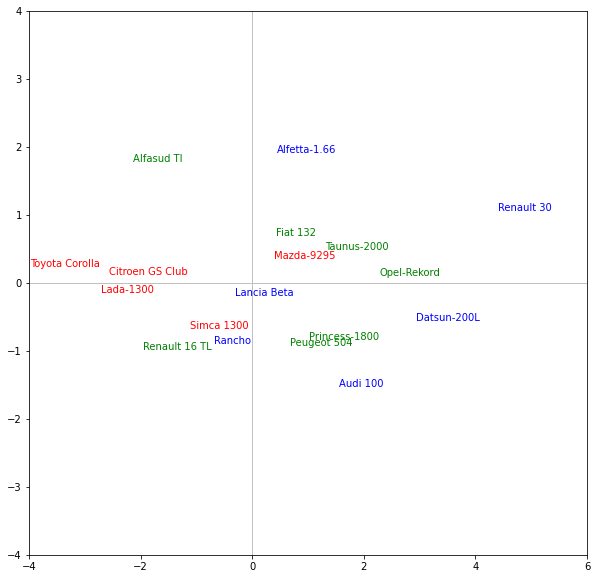

In [51]:
# liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-4,6)
axes.set_ylim(-4,4)


#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
#numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
#les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

#### 3.4 Calcul des barycentres des modalitées de la variable qualitative

Puis nous calculons les positions des **barycentres conditionnels** dans le plan factoriel.


In [52]:
# structure intermédiaire
barycentreGroup = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1] })

# on calcul les moyennes conditionnelles
print(barycentreGroup.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

                F1        F2
Finition                    
1_M      -2.000355 -0.022579
2_B       0.235313  0.045271
3_TB      1.392430 -0.034001
